# Tarea 6

Nataly Roa Peña

Guillermo de Mendoza

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [63]:
directorio ="/home/nataly/Documentos/mineria/datos/"
archi = 'ETL-out.csv'
file=directorio+archi

df = pd.read_csv(file)
df.head()

,Unnamed: 0,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Headquarters Regions,Founded Date,Founded Date Precision,...,maxNumberEmployees,isCompanyTypeForProfit,isCompanyPrivate,hasWebsite,hasTwitter,hasFacebook,hasLinkedIn,hasContactEmail,hasPhoneNumber,isOperating
0,0,La Haus,https://www.crunchbase.com/organization/la-haus,"Information Technology, Marketplace, Real Esta...","Medellín, Antioquia, Colombia",La Haus is a residential marketplace used to h...,1.457,Latin America,01/04/2017,day,...,250.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,1,Elenas,https://www.crunchbase.com/organization/elenas,"Beauty, Cosmetics, Direct Sales, E-Commerce","Bogotá, Distrito Especial, Colombia",Elenas is a Latin American social commerce pla...,2.462,Latin America,01/01/2018,year,...,5000.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,Dondo,https://www.crunchbase.com/organization/crowdswap,NaN,"Bogotá, Distrito Especial, Colombia",Get what you want giving what you have,3.109,Latin America,01/04/2019,day,...,5000.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,3,Aflore,https://www.crunchbase.com/organization/aflore,"Credit, Finance, Financial Services, FinTech","Bogotá, Distrito Especial, Colombia",Aflore is a developer of tech-enabled direct s...,3.449,Latin America,01/01/2012,year,...,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4,Backstartup,https://www.crunchbase.com/organization/backst...,"Accounting, Financial Services, Small and Medi...","Bogotá, Distrito Especial, Colombia",SwaS (Software with a services) that automates...,3.607,Latin America,08/09/2014,day,...,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [64]:
#Eliminar columna 'Unnamed: 0' 
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 55 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Organization Name                              229 non-null    object 
 1   Organization Name URL                          229 non-null    object 
 2   Industries                                     223 non-null    object 
 3   Headquarters Location                          229 non-null    object 
 4   Description                                    229 non-null    object 
 5   CB Rank (Company)                              229 non-null    float64
 6   Headquarters Regions                           229 non-null    object 
 7   Founded Date                                   223 non-null    object 
 8   Founded Date Precision                         223 non-null    object 
 9   Number of Articles                             229 non

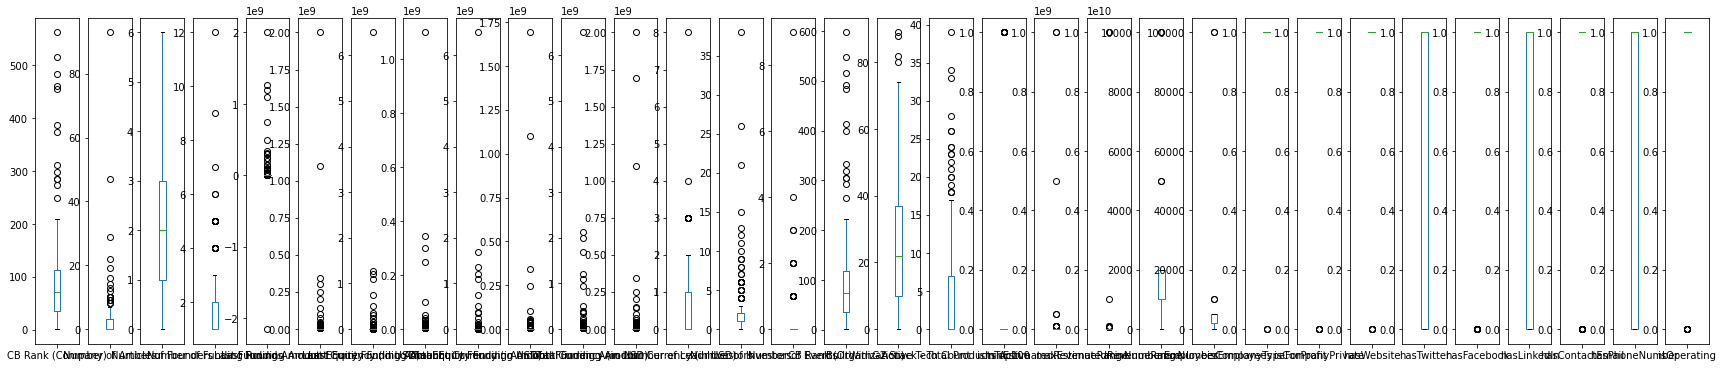

In [66]:
df.plot(kind='box', subplots=True, figsize=(30,6));

denotamos que nuestros datos tienen que pasor por un sobre escalamiento

<AxesSubplot:>

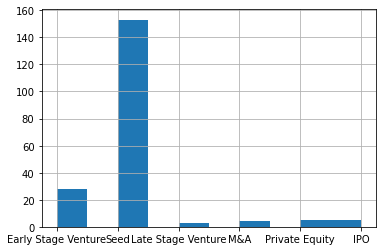

In [67]:
df['Funding Status'].hist()

<AxesSubplot:>

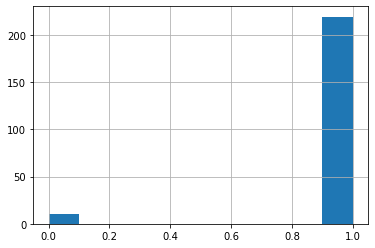

In [68]:
df['isOperating'].hist()

In [69]:
# funcion para graficar variables categoricas
def bar_plot(x, y, ax, title, x_label, y_label, ymax):
    
    ax.bar(x,y, color = 'red')   
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.grid(True)
        
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        Y = rect.get_height()
        X = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if Y < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(Y)

        # Create annotation
        ax.annotate(
            label,
            (X, Y),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

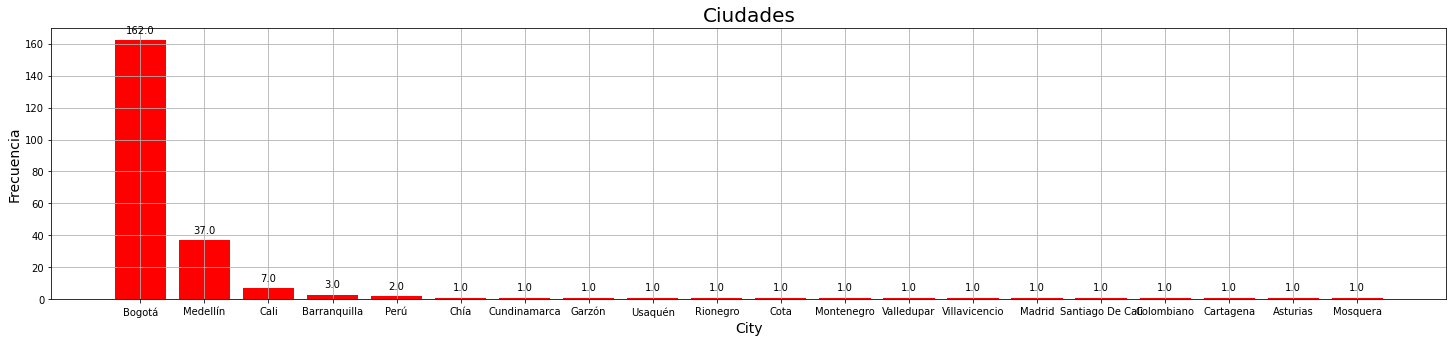

In [70]:
fig,ax = plt.subplots(1,1, figsize=(25, 5))

a_graficar = 'City'
x=df[a_graficar].value_counts(dropna=True).keys()
y=df[a_graficar].value_counts(dropna=True).to_list()
bar_plot(x[:20], y[:20], ax, title='Ciudades', x_label=a_graficar, y_label = 'Frecuencia', ymax=700)

In [71]:
df['Total Funding Amount Currency'].value_counts()

USD    201
EUR     13
COP     13
BRL      1
CAD      1
Name: Total Funding Amount Currency, dtype: int64

In [72]:
df_colombia=df[(df['City'] == 'Canadá')]
df_colombia.head(3)

,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Headquarters Regions,Founded Date,Founded Date Precision,Number of Articles,...,maxNumberEmployees,isCompanyTypeForProfit,isCompanyPrivate,hasWebsite,hasTwitter,hasFacebook,hasLinkedIn,hasContactEmail,hasPhoneNumber,isOperating
64,Qinaya,https://www.crunchbase.com/organization/qinaya,"Cloud Data Services, Web Development","Canadá, Cundinamarca, Colombia",Qinaya offers a range of web design and develo...,44.001,Latin America,NaN,NaN,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
#Remplazar algunos datos
df['City'].replace('Perú', 'Valle del Cauca', inplace=True)
df['City'].replace('Brasilia', 'Otro', inplace=True)
df['City'].replace('Colombiano', 'Otro', inplace=True)

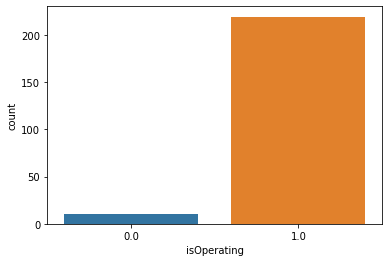

In [74]:
sns.countplot(x='isOperating',data=df)
plt.show()

In [75]:
df['isOperating'].value_counts(normalize=True)

1.0    0.956332
0.0    0.043668
Name: isOperating, dtype: float64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 55 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Organization Name                              229 non-null    object 
 1   Organization Name URL                          229 non-null    object 
 2   Industries                                     223 non-null    object 
 3   Headquarters Location                          229 non-null    object 
 4   Description                                    229 non-null    object 
 5   CB Rank (Company)                              229 non-null    float64
 6   Headquarters Regions                           229 non-null    object 
 7   Founded Date                                   223 non-null    object 
 8   Founded Date Precision                         223 non-null    object 
 9   Number of Articles                             229 non

Tenemos que hacer un balanceo de datos, ya que y esta con 1=95% y  0=6%

In [77]:
df.drop(['Organization Name URL', 'Headquarters Regions', 'Country'], axis='columns', inplace=True)

In [78]:
# VOLVER INDICE MI NUMERO DE 'Organization Name'
df.set_index('Organization Name', inplace=True)

In [79]:
#identificar variables numericas
df_num = df.select_dtypes(exclude=['object'])
df_num

,CB Rank (Company),Number of Articles,Number of Founders,Number of Funding Rounds,Last Funding Amount,Last Funding Amount Currency (in USD),Last Equity Funding Amount,Last Equity Funding Amount Currency (in USD),Total Equity Funding Amount,Total Equity Funding Amount Currency (in USD),...,maxNumberEmployees,isCompanyTypeForProfit,isCompanyPrivate,hasWebsite,hasTwitter,hasFacebook,hasLinkedIn,hasContactEmail,hasPhoneNumber,isOperating
Organization Name,,,,,,,,,,,,,,,,,,,,,
La Haus,1.457,8.0,5.0,7,35000000,35000000,35000000.0,35000000.0,57649998.0,57649998.0,...,250.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
Elenas,2.462,7.0,2.0,3,6000000,6000000,6000000.0,6000000.0,8540000.0,8540000.0,...,5000.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
Dondo,3.109,12.0,4.0,2,2100000,2100000,2100000.0,2100000.0,2100000.0,2100000.0,...,5000.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
Aflore,3.449,4.0,2.0,12,6500000,6500000,6500000.0,6500000.0,10550000.0,10550000.0,...,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Backstartup,3.607,2.0,4.0,4,1200000,1200000,1200000.0,1200000.0,2065000.0,2065000.0,...,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Milmenus.com,454.636,0.0,2.0,1,7500,7500,7500.0,7500.0,7500.0,7500.0,...,2000.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
Market Over Video,461.041,0.0,1.0,1,24913,35201,24913.0,35201.0,24913.0,35201.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Toomga,483.454,0.0,2.0,1,11934,16725,11934.0,16725.0,11934.0,16725.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [80]:
#Identificar variables categoricas
df_cate = df.select_dtypes(exclude=['float64', 'int64'])
df_cate

,Industries,Headquarters Location,Description,Founded Date,Founded Date Precision,Full Description,Industry Groups,Founders,Funding Status,Last Funding Date,Last Funding Amount Currency,Last Funding Type,Last Equity Funding Amount Currency,Last Equity Funding Type,Total Equity Funding Amount Currency,Total Funding Amount Currency,Top 5 Investors,City,State
Organization Name,,,,,,,,,,,,,,,,,,,
La Haus,"Information Technology, Marketplace, Real Esta...","Medellín, Antioquia, Colombia",La Haus is a residential marketplace used to h...,01/04/2017,day,La Haus offers an online residential platform ...,"Commerce and Shopping, Information Technology,...","Jeronimo Uribe, Rodrigo Sanchez-Rios, Rodrigo ...",Early Stage Venture,14/01/2021,USD,Series B,USD,Series B,USD,USD,"Greenspring Associates, NFX, Spencer Rascoff, ...",Medellín,Antioquia
Elenas,"Beauty, Cosmetics, Direct Sales, E-Commerce","Bogotá, Distrito Especial, Colombia",Elenas is a Latin American social commerce pla...,01/01/2018,year,Elenas is Latin America's top social commerce ...,"Commerce and Shopping, Consumer Goods, Sales a...","Thomas Harsch, Zach Oschin",Early Stage Venture,04/03/2021,USD,Series A,USD,Series A,USD,USD,"FJ Labs, Polymath Ventures, Meesho, Alpha4 Ven...",Bogotá,Distrito Especial
Dondo,NaN,"Bogotá, Distrito Especial, Colombia",Get what you want giving what you have,01/04/2019,day,NaN,NaN,"Carlos Sánchez, Daniel Marulanda, Jesus Marque...",Seed,19/01/2021,USD,Seed,USD,Seed,USD,USD,"Alpha Edison, AME Cloud Ventures, Jerry Yang, ...",Bogotá,Distrito Especial
Aflore,"Credit, Finance, Financial Services, FinTech","Bogotá, Distrito Especial, Colombia",Aflore is a developer of tech-enabled direct s...,01/01/2012,year,Aflore is a financial services company empower...,"Financial Services, Lending and Investments","Ana Barrera, Manuel Jimenez",NaN,05/02/2021,USD,Venture - Series Unknown,USD,Venture - Series Unknown,USD,USD,"Polymath Ventures, Unreasonable Capital, Amado...",Bogotá,Distrito Especial
Backstartup,"Accounting, Financial Services, Small and Medi...","Bogotá, Distrito Especial, Colombia",SwaS (Software with a services) that automates...,08/09/2014,day,At Backstartup we want to reinvent the relatio...,"Financial Services, Other, Professional Services","Adriana Villamizar, Cristian Villamizar, Diego...",Seed,17/02/2021,USD,Seed,USD,Seed,USD,USD,"MassChallenge, 500 Startups, Alaya Capital Par...",Bogotá,Distrito Especial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Milmenus.com,"Mobile, Restaurants","Bogotá, Distrito Especial, Colombia",Milmenus is a Colombia-based restaurant menu g...,07/06/2010,day,Milmenus.com is the best and most profound res...,"Food and Beverage, Mobile","Raul Daza, Sergio Daza",Seed,07/06/2010,USD,Seed,USD,Seed,USD,USD,NaN,Bogotá,Distrito Especial
Market Over Video,Video,"Bogotá, Distrito Especial, Colombia",Market Over Video,NaN,NaN,Market Over Video was founded by Camilo Triana.,"Media and Entertainment, Video",Camilo Triana,Seed,05/09/2011,EUR,Seed,EUR,Seed,EUR,EUR,Wayra,Bogotá,Distrito Especial
Toomga,"Market Research, Public Relations","Bogotá, Distrito Especial, Colombia",Toomga is to create an entertainment space in ...,01/01/2011,year,NaN,"Data and Analytics, Design, Sales and Marketing","Edgar Castaneda, Erick Rojas",Seed,06/09/2011,EUR,Seed,EUR,Seed,EUR,EUR,Wayra,Bogotá,Distrito Especial


In [81]:
#Trasformacon de datos categoricos a numerico
df_cate=pd.get_dummies(df_cate)
df_cate

,"Industries_3D Technology, Hospital, Medical, Medical Device","Industries_Accounting, Apps, E-Commerce, Internet, Mobile Apps, Software","Industries_Accounting, Financial Services, Small and Medium Businesses","Industries_Adventure Travel, Social Entrepreneurship","Industries_Advertising, App Marketing, Digital Media, Semantic Search, SEO, Social Media, Social Media Marketing","Industries_Advertising, Apps, Photo Sharing, Social Media Marketing, Video Streaming","Industries_Advertising, Commercial Real Estate, Real Estate, Real Estate Investment","Industries_Advertising, Consumer, E-Commerce, iOS, Real Time, Software","Industries_Advertising, Digital Marketing, Information Technology","Industries_Advertising, Email Marketing, Internet, SEO, Social Media Marketing",...,State_Atlantico,State_Bolivar,State_Cesar,State_Cundinamarca,State_Distrito Especial,State_Huila,State_Magdalena,State_Meta,State_Quindio,State_Valle del Cauca
Organization Name,,,,,,,,,,,,,,,,,,,,,
La Haus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Elenas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Dondo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Aflore,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Backstartup,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Milmenus.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Market Over Video,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Toomga,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [82]:
#Concatenar datos numerico y los de trasformacion
datos_final = pd.concat([df_cate, df_num], axis=1)
datos_final.head()

,"Industries_3D Technology, Hospital, Medical, Medical Device","Industries_Accounting, Apps, E-Commerce, Internet, Mobile Apps, Software","Industries_Accounting, Financial Services, Small and Medium Businesses","Industries_Adventure Travel, Social Entrepreneurship","Industries_Advertising, App Marketing, Digital Media, Semantic Search, SEO, Social Media, Social Media Marketing","Industries_Advertising, Apps, Photo Sharing, Social Media Marketing, Video Streaming","Industries_Advertising, Commercial Real Estate, Real Estate, Real Estate Investment","Industries_Advertising, Consumer, E-Commerce, iOS, Real Time, Software","Industries_Advertising, Digital Marketing, Information Technology","Industries_Advertising, Email Marketing, Internet, SEO, Social Media Marketing",...,maxNumberEmployees,isCompanyTypeForProfit,isCompanyPrivate,hasWebsite,hasTwitter,hasFacebook,hasLinkedIn,hasContactEmail,hasPhoneNumber,isOperating
Organization Name,,,,,,,,,,,,,,,,,,,,,
La Haus,0,0,0,0,0,0,0,0,0,0,...,250.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
Elenas,0,0,0,0,0,0,0,0,0,0,...,5000.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
Dondo,0,0,0,0,0,0,0,0,0,0,...,5000.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
Aflore,0,0,0,0,0,0,0,0,0,0,...,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Backstartup,0,0,1,0,0,0,0,0,0,0,...,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


# Clasificar datos de entrenamiento y testeo

In [119]:
# Asignacion de valores
cols = [x for x in datos_final.columns if x not in  ['isInTop100']]

X = datos_final[cols].values
y = datos_final['isInTop100'].values

In [121]:
#Escalar los datos usando StandardScaler
# scaler= StandardScaler()
scaler = MinMaxScaler(feature_range=(-1,1) )
X_scale = scaler.fit_transform(X)

#scaler_y = MinMaxScaler(feature_range=(-1,1) )
#y_scale = scaler.fit_transform(y)

In [122]:
#El split para X_train/test
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=42)

In [123]:
#Balanceo de datos
smt = SMOTE(random_state=0)
data_X, data_y =smt.fit_resample(X_train, y_train)

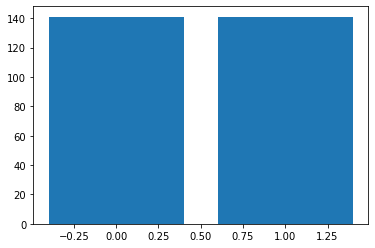

In [124]:
unique, counts = np.unique(data_y, return_counts=True)
plt.bar(unique, counts);

In [129]:
pca = PCA(0.85)
pca.fit(data_X)
print(pca.explained_variance_ratio_)

[0.08533377 0.06585087 0.05355116 0.05054492 0.03853637 0.03722745
 0.0310836  0.0254391  0.02282492 0.02024438 0.0198869  0.01923262
 0.01829101 0.01646844 0.01543618 0.01333348 0.01294696 0.01241312
 0.01182552 0.0105004  0.01021315 0.00970268 0.00883746 0.00821313
 0.00806591 0.00793413 0.00716952 0.00696495 0.00659827 0.00647135
 0.00602979 0.00584329 0.00539177 0.00531884 0.0052218  0.00482527
 0.00473565 0.0047048  0.00449469 0.00440815 0.00432057 0.00419105
 0.00416536 0.00398273 0.00390345 0.00383294 0.00377642 0.00371612
 0.00360107 0.00350861 0.00342778 0.00340604 0.00327553 0.00321476
 0.00317135 0.00315247 0.00312423 0.00307579 0.00305504 0.00301473
 0.00298167 0.00294718 0.00292111 0.0028899  0.00288006 0.00280994
 0.00279739 0.00276103 0.00272419 0.00269763 0.00267334 0.00264772
 0.00262544 0.00259225 0.00258406 0.0025727  0.00256446 0.0025428
 0.00250714 0.0024838  0.00248202 0.00247135 0.00245362 0.00244725
 0.00244528 0.00244169]


In [130]:
x_pca = pca.transform(data_X)

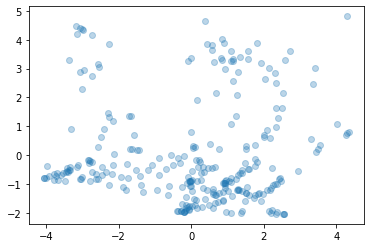

In [131]:
x_values = x_pca[:, 0]
y_values = x_pca[:, 1]
z_values = x_pca[:, 2]
plt.scatter(x_values, y_values, alpha=0.3)

No handles with labels found to put in legend.


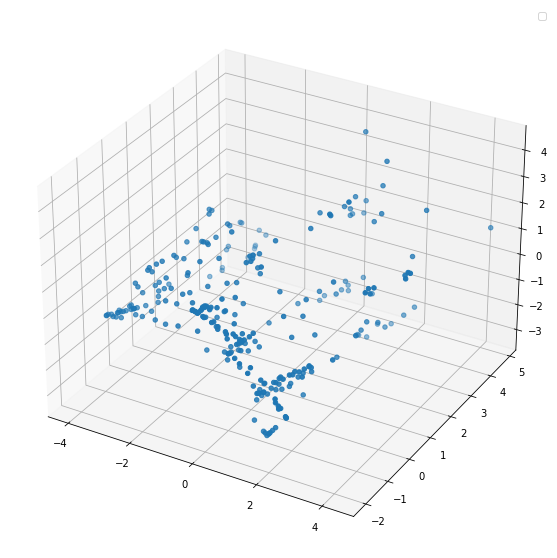

In [132]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_values, y_values, z_values, marker='o')

ax.legend()

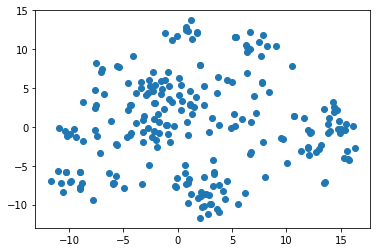

In [92]:
from sklearn.manifold import TSNE

tsne = TSNE()
tsne.fit(X_scale) 
x_tsne = tsne.fit_transform(X_scale)

plt.scatter(x_tsne[:, 0], x_tsne[:, 1])

Epoch 1/1000
4/4 [==============================] - 3s 189ms/step - loss: 1.3386 - val_loss: 0.0375
Epoch 2/1000
4/4 [==============================] - 0s 111ms/step - loss: 0.0374 - val_loss: 0.0382
Epoch 3/1000
4/4 [==============================] - 0s 123ms/step - loss: 0.0365 - val_loss: 0.0364
Epoch 4/1000
4/4 [==============================] - 0s 113ms/step - loss: 0.0364 - val_loss: 0.0373
Epoch 5/1000
4/4 [==============================] - 0s 113ms/step - loss: 0.0363 - val_loss: 0.0361
Epoch 6/1000
4/4 [==============================] - 0s 114ms/step - loss: 0.0360 - val_loss: 0.0376
Epoch 7/1000
4/4 [==============================] - 0s 115ms/step - loss: 0.0361 - val_loss: 0.0365
Epoch 8/1000
4/4 [==============================] - 0s 115ms/step - loss: 0.0358 - val_loss: 0.0375
Epoch 9/1000
4/4 [==============================] - 0s 112ms/step - loss: 0.0363 - val_loss: 0.0359
Epoch 10/1000
4/4 [==============================] - 0s 114ms/step - loss: 0.0368 - val_loss: 0.0363

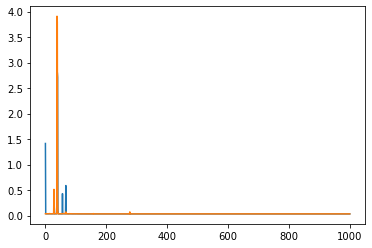

In [98]:
fun_act = 'tanh'
epoch = [1000]#[100, 200, 500, 1000]   
batch = [32]#[ 32,  64, 128,  256]  
neur_capa1 = 1627
neur_capa2 = 1000
neur_capa3 = 750
neur_capa4 = 550
neur_capa5 = 250
neur_capa6 = 99
neur_capa7 = 75
neur_capa8 = 65
neur_capa9 = 25
neur_capa10 = 15
neur_capa11 = 10
neur_capa12 = 9
#neur_capa13 = 3

for i_epoch in epoch:
    for i_batch in batch:
        
        capa1 = Dense(neur_capa1,activation=fun_act)
        capa2 = Dense(neur_capa2,activation=fun_act)
        capa3 = Dense(neur_capa3,activation=fun_act)
        capa4 = Dense(neur_capa4,activation=fun_act)
        capa5 = Dense(neur_capa5,activation=fun_act)
        capa6 = Dense(neur_capa6,activation=fun_act)
        capa7 = Dense(neur_capa7,activation=fun_act)
        capa8 = Dense(neur_capa8,activation=fun_act)
        capa9 = Dense(neur_capa9,activation=fun_act)
        capa10 = Dense(neur_capa10,activation=fun_act)
        capa11 = Dense(neur_capa11,activation=fun_act)
        capa12 = Dense(neur_capa12,activation=fun_act)
        #capa13 = Dense(neur_capa13,activation=fun_act)
        
        encoder = Sequential()
        encoder.add(capa1)
        encoder.add(capa2)
        encoder.add(capa3)
        encoder.add(capa4)
        encoder.add(capa5)
        encoder.add(capa6)
        encoder.add(capa7)
        encoder.add(capa8)
        encoder.add(capa9)
        encoder.add(capa10)
        encoder.add(capa11)
        encoder.add(capa12)
        #encoder.add(capa13)
        

        decoder = Sequential()
        #decoder.add(Dense(neur_capa12,activation=fun_act))
        decoder.add(Dense(neur_capa11,activation=fun_act))
        decoder.add(Dense(neur_capa10,activation=fun_act))
        decoder.add(Dense(neur_capa9,activation=fun_act))
        decoder.add(Dense(neur_capa8,activation=fun_act))
        decoder.add(Dense(neur_capa7,activation=fun_act))
        decoder.add(Dense(neur_capa6,activation=fun_act))
        decoder.add(Dense(neur_capa5,activation=fun_act))
        decoder.add(Dense(neur_capa4,activation=fun_act))
        decoder.add(Dense(neur_capa3,activation=fun_act))
        decoder.add(Dense(neur_capa2,activation=fun_act))
        decoder.add(Dense(neur_capa1,activation=fun_act))

        autoencoder = Sequential([encoder,decoder])
        #autoencoder = Sequential([encoder,encoder])
        #autoencoder = Sequential([encoder])
        autoencoder.compile(loss="mse")
        #autoencoder.fit(encoder,encoder,epochs=i_epoch, validation_split=0.3,batch_size = i_batch);
        autoencoder.fit(X_train,X_train,epochs=i_epoch, validation_split=0.3,batch_size = i_batch);
     
        #encoder.compile(loss="mse")
        #encoder.fit(x_scaled_entrenamiento,x_scaled_entrenamiento,epochs=i_epoch, validation_split=0.3,batch_size = i_batch)
        
        plt.plot(autoencoder.history.history['loss'])
        plt.plot(autoencoder.history.history['val_loss'])
        #plt.savefig("("+str(neur_capa1)+","+str(neur_capa2)+","+str(neur_capa3)+") LOSS - fun_act = "+fun_act+" - epoch ="+str(i_epoch)+" - batch="+str(i_batch)+".jpg")
               
        x_pred=autoencoder.predict(X_train)
        
        #fig, ax = plt.subplots(ncols=3, nrows=6, figsize=(30, 25))
        #ax = ax.flatten()
        #for i in range(16):
            #pd.crosstab(df[col],df.y).plot(kind='bar', ax=ax[i])
            #ax[i].scatter(x_pred[:,i],x_scaled_entrenamiento[:,i]) 
            #ax[i].set_title('entrenamiento vs predicho'.format(col))
            #ax[i].set_xlabel('predicho')
            #ax[i].set_ylabel('entrenamiento')
        #plt.savefig("("+str(capa1)+","+str(capa2)+","+str(capa3)+") fun_act = "+fun_act+" - epoch ="+str(i_epoch)+" - batch="+str(i_batch)+".jpg")
        
        #fig, ax = plt.subplots(ncols=2, nrows=16, figsize=(15, 40))
        #for i in range(16):
            #col = i;
            #ax[i,0].hist(x_pred[:,col])
            #ax[i,1].hist(x_scaled_entrenamiento[:,col])
        #plt.savefig("("+str(capa1)+","+str(capa2)+","+str(capa3)+") HIST fun_act = "+fun_act+" - epoch ="+str(i_epoch)+" - batch="+str(i_batch)+".jpg")

In [99]:
encoded = encoder.predict(X_train)

In [100]:
df_RN_reducido = pd.DataFrame(encoded, columns = ['X1','X2','X3','X4','X5','X6','X7','X8','X9'])
print(df_RN_reducido.shape)
df_RN_reducido.head(3)

(160, 9)


,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,-0.535688,-0.32684,0.586859,0.351522,0.88428,0.321720,-0.422076,-0.297937,0.032373
1,-0.535688,-0.32684,0.586859,0.351522,0.88428,0.321719,-0.422076,-0.297937,0.032373
2,-0.535688,-0.32684,0.586859,0.351522,0.88428,0.321719,-0.422076,-0.297937,0.032373


In [127]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


reg = LinearRegression()
reg.fit(data_X, data_y)
coef = reg.coef_
inter= reg.intercept_
# print(coef, inter)
func = 'y = {}x1 + {}x2 + {}'.format(np.round(coef[0], 3), np.round(coef[1], 3), np.round(inter, 3))
print( func)



y = -0.012x1 + -0.01x2 + 0.68


In [134]:
ypred = reg.predict(data_X)

r = reg.score(data_X, data_y)
r2  = r**2
n = X.shape[0]
k = X.shape[1]

r2a = 1-((n-1)/(n-k-1))*(1-r2)
err_tip = np.std(ypred)/n

print('Coeficiente de correlacion:',   r2)
print('Coeficiente de determinacion:', r)
print('R2 ajustado:', r2a)
print('Error tipico:', err_tip)
print('Observaciones:', n)

Coeficiente de correlacion: 1.0
Coeficiente de determinacion: 1.0
R2 ajustado: 1.0
Error tipico: 0.002183406113537118
Observaciones: 229


In [135]:
reg.coef_

array([-0.01227567, -0.01001913,  0.02183462, ...,  0.01002827,
       -0.01004381, -0.00767945])

In [136]:
reg.intercept_

0.6796352037012192

In [138]:
Xc = sm.add_constant(data_X)
model = sm.OLS(data_y, Xc).fit(intercept=False)

In [139]:
predictions = model.predict(Xc)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.346e+26
Date:                Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:01:00   Log-Likelihood:                 8394.2
No. Observations:                 282   AIC:                        -1.647e+04
Df Residuals:                     122   BIC:                        -1.589e+04
Df Model:                         159                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0013    2.8e-15  -4.83e+11      0.0

In [140]:
results =model.get_prediction()


In [141]:
err_pred = results.conf_int()

Text(0.5, 1.0, 'Model Prediction')

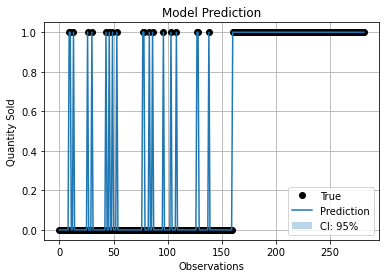

In [143]:
plt.plot(data_y, 'ko', label='True')
plt.plot(ypred, label='Prediction')
plt.fill_between(x= np.arange(len(data_y)), y1=err_pred[:,0], y2=err_pred[:,1], alpha=0.3, label='CI: 95%' )
plt.legend()
plt.grid()

plt.ylabel('Quantity Sold')
plt.xlabel('Observations')
plt.title('Model Prediction')